In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import pickle as pk

In [4]:
df=pd.read_csv(r"C:\Users\Suyash Tambe\Desktop\New folder\FA-KES-Dataset.csv",encoding='iso-8859-1')
df.head()

,unit_id,article_title,article_content,source,date,location,labels,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,4/5/2017,idlib,0,NaN,NaN,NaN,NaN
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,4/7/2017,homs,0,NaN,NaN,NaN,NaN
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,4/16/2017,aleppo,0,NaN,NaN,NaN,NaN
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo,0,NaN,NaN,NaN,NaN
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,7/10/2016,aleppo,0,NaN,NaN,NaN,NaN


In [169]:
def report(y_test,y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    jaccard_indices = [jaccard_score(y_test, y_pred, average='micro') for true_label_set, predicted_label_set in zip(y_test, y_pred)]
    average_jaccard_index = sum(jaccard_indices) / len(jaccard_indices)
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    print("accuracy is: ", accuracy)
    print("F1 score: ",f1)
    print("Precision: ",precision)
    print("Recall: ",recall)
    print(f"Average Jaccard Index: {average_jaccard_index:.2f}")

In [170]:
df=df.iloc[:,:7]
df.head()

,unit_id,article_title,article_content,source,date,location,labels
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,4/5/2017,idlib,0
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,4/7/2017,homs,0
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,4/16/2017,aleppo,0
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo,0
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,7/10/2016,aleppo,0


In [171]:
df.dtypes

unit_id             int64
article_title      object
article_content    object
source             object
date               object
location           object
labels              int64
dtype: object

KNN Classifier

In [172]:
X = df['article_content']
y = df['labels']

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:
vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [175]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train_tfidf, y_train)

KNeighborsClassifier(n_neighbors=100)

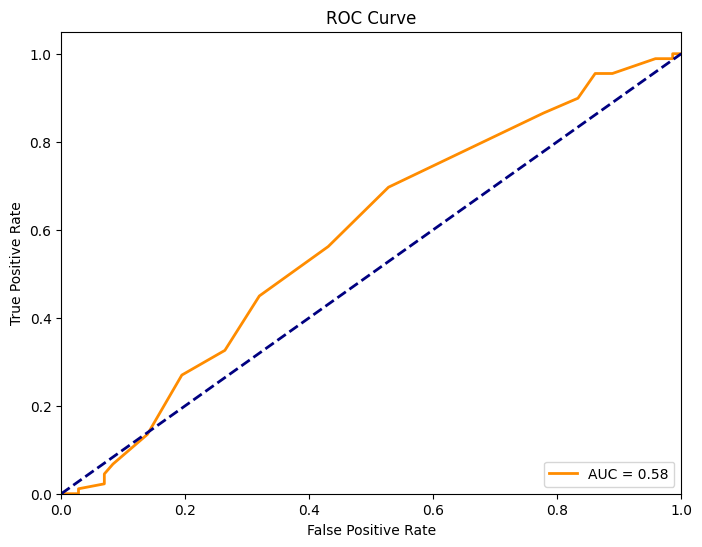

In [176]:
y_pred_prob = knn.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [177]:
y_pred = knn.predict(X_test_tfidf)

In [178]:
# Calculate the accuracy of the k-NN classifier
report(y_test, y_pred)

accuracy is:  0.5714285714285714
F1 score:  0.6986899563318777
Precision:  0.5714285714285714
Recall:  0.5714285714285714
Average Jaccard Index: 0.40


In [179]:
with open("fake_news_dataset_and_model/knn_model.pkl","wb") as file:
    pk.dump(knn,file)

with open("fake_news_dataset_and_model/vectorizer.pkl","wb") as file:
    pk.dump(vectorizer,file)

Naive Bayes classifier

In [180]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf, y_train)

MultinomialNB()

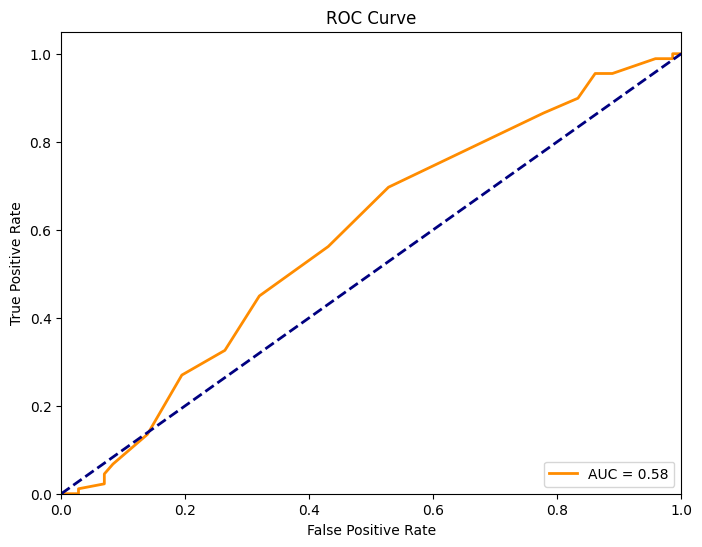

In [181]:
y_pred_prob = knn.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [182]:
y_pred = naive_bayes.predict(X_test_tfidf)

In [183]:
# Calculate the accuracy of the Naive Bayes classifier
report(y_test, y_pred)

accuracy is:  0.5590062111801242
F1 score:  0.7053941908713693
Precision:  0.5590062111801242
Recall:  0.5590062111801242
Average Jaccard Index: 0.39


Logistic Regression

In [184]:
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

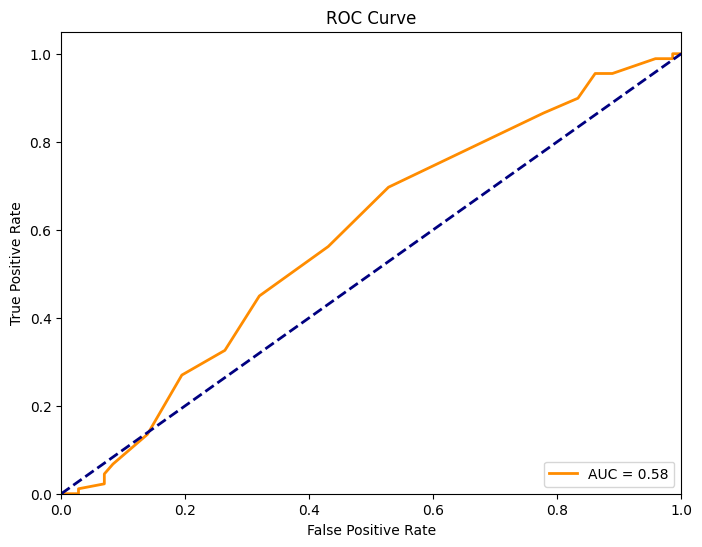

In [185]:
y_pred_prob = knn.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [186]:
y_pred = logistic_regression.predict(X_test_tfidf)

In [187]:
# Calculate the accuracy of the Logistic Regression classifier
report(y_test, y_pred)

accuracy is:  0.5590062111801242
F1 score:  0.64321608040201
Precision:  0.5590062111801242
Recall:  0.5590062111801242
Average Jaccard Index: 0.39
